In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
Consumer_Key = "3HO6kPG8IkepplriklZTy9E66"
Consumer_Secret_Key = "8NbLGtNGOpsuB7RIktwIQuYt5NbBibeL4JXaOEEbHeJRWzqqNa"
Access_Token = "1435589046453956612-gAXLJOozWrSLhtrJ6gDdE6vPBBn3Qh"
Access_Token_Secret = "CmWnvaMKKzQ6Gik7rX7yZ7UsEHLPa50vJrW1Yt9V0BiEc"

In [ ]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [ ]:
posts = api.user_timeline(screen_name="bliblidotcom", count = 1000, lang ="en", tweet_mode="extended")

# Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:10]:
  print(str(i) +')'+ tweet.full_text+ '\n')
  i=i+1

Show the 5 recent tweets:

1)SELAMAT: @derian1912 &amp; @Dj__God! DM YAAH!

Btw, buat yang butuh kirim cepet bgt pake Blibli 2 Jam Sampai gih!

24 jam ready! Klik: https://t.co/UHkHJsAjhV #BlibliINSPO https://t.co/HATTxoFuS7

2)SEWA MOBIL CUMA 10RB?? 

https://t.co/cRR8bglqAx #BlibliTIVO https://t.co/0LCd2AivgJ

3)Untuk harga segini, jujuuurr ok bgt sih.

https://t.co/rdBjkTZquj #BlibliHTA https://t.co/umufXu7k4z

4)Eh parah jadi murah2 bgt nih. Buruan sikat deh kalo ukuran kamu masi ada.

https://t.co/LLudhIsy9T #BlibliFPR https://t.co/qiugATCajn

5)RT @rrestuadi: @bliblidotcom @88rising Gass sameday https://t.co/YvqofTo0ih

6)CUCI GUDANG official merch-nya @88rising! 🚀

 https://t.co/ocpmESWDDZ #BlibliFPR https://t.co/czxKHg6gaX

7)Kalo dibeli warnanya hitam, ⚫️
Kalo dibakar warnanya merah, 🔴
Kalo dibuang warnanya abu2. 🥈
Apakah aku? 

https://t.co/ze7tPIhwH3 #BlibliHOM https://t.co/YhgC6WPYFA

8)Seperti biasa, #NKKCHI yuk ah! Nanti Kita Kasih Cepek Hari Ini! Mau CEPEK?

- FOLLOW aku

In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show 10 rows of data
df.head()

,Tweets
0,SELAMAT: @derian1912 &amp; @Dj__God! DM YAAH!\...
1,SEWA MOBIL CUMA 10RB?? \n\nhttps://t.co/cRR8bg...
2,"Untuk harga segini, jujuuurr ok bgt sih.\n\nht..."
3,Eh parah jadi murah2 bgt nih. Buruan sikat deh...
4,RT @rrestuadi: @bliblidotcom @88rising Gass sa...


In [ ]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removing Text and Number
  text = re.sub(r'#','', text) #removing Hastag
  text = re.sub(r'RT[\s]+','', text) #removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #removing hyperlink

  return text

df['Tweets']=df['Tweets'].apply(cleanTxt)
df

,Tweets
0,"SELAMAT: &amp; __God! DM YAAH!\n\nBtw, buat y..."
1,SEWA MOBIL CUMA 10RB?? \n\n BlibliTIVO
2,"Untuk harga segini, jujuuurr ok bgt sih.\n\n B..."
3,Eh parah jadi murah2 bgt nih. Buruan sikat deh...
4,: Gass sameday
...,...
195,Official store semua kok kak~
196,Tipe kacamata yg sesuai dgn bentuk muka:\n\n(🖥...
197,Neduh? Hahaha gk dulu\n\n BlibliOTO
198,Awas kaget! ⚠️


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns 'Subjectiviy' & 'Polarity'
df['Subjectiviy'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectiviy,Polarity
0,"SELAMAT: &amp; __God! DM YAAH!\n\nBtw, buat y...",0.5,0.25
1,SEWA MOBIL CUMA 10RB?? \n\n BlibliTIVO,0.0,0.00
2,"Untuk harga segini, jujuuurr ok bgt sih.\n\n B...",0.5,0.50
3,Eh parah jadi murah2 bgt nih. Buruan sikat deh...,0.0,0.00
4,: Gass sameday,0.0,0.00
...,...,...,...
195,Official store semua kok kak~,0.0,0.00
196,Tipe kacamata yg sesuai dgn bentuk muka:\n\n(🖥...,0.0,0.00
197,Neduh? Hahaha gk dulu\n\n BlibliOTO,0.4,0.20
198,Awas kaget! ⚠️,0.0,0.00


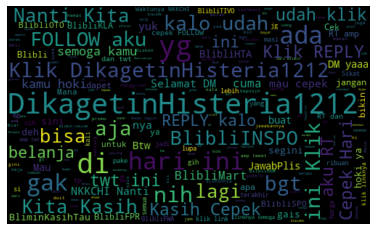

In [ ]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#create a function to compute negative (-1) neutral (0) and positive (+1) analysis

def getAnalysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectiviy,Polarity,Analysis
0,"SELAMAT: &amp; __God! DM YAAH!\n\nBtw, buat y...",0.5,0.25,positive
1,SEWA MOBIL CUMA 10RB?? \n\n BlibliTIVO,0.0,0.00,neutral
2,"Untuk harga segini, jujuuurr ok bgt sih.\n\n B...",0.5,0.50,positive
3,Eh parah jadi murah2 bgt nih. Buruan sikat deh...,0.0,0.00,neutral
4,: Gass sameday,0.0,0.00,neutral
...,...,...,...,...
195,Official store semua kok kak~,0.0,0.00,neutral
196,Tipe kacamata yg sesuai dgn bentuk muka:\n\n(🖥...,0.0,0.00,neutral
197,Neduh? Hahaha gk dulu\n\n BlibliOTO,0.4,0.20,positive
198,Awas kaget! ⚠️,0.0,0.00,neutral


In [ ]:
print('Negative tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'negative'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Negative tweets:

1) Duh mayan bgt ni POCO X3 jadi segini. Lanjut gak ni?

 DikagetinHisteria1212 



In [ ]:
print('Positive tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'positive'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Positive tweets:

1) SELAMAT:  &amp; __God! DM YAAH!

Btw, buat yang butuh kirim cepet bgt pake Blibli 2 Jam Sampai gih!

24 jam ready! Klik:  BlibliINSPO 

2) Untuk harga segini, jujuuurr ok bgt sih.

 BlibliHTA 

3) SPESIAL 6 JAM TERAKHIR DikagetinHisteria1212!

BERLAKU UNTUK SEMUA, jangan lupa main lucky tap-nya juga yah abis belanja!

 

4) Undian UCL gak sesuai harapan (lagi)? Hibur diri di sini aja kali~

LIVE NIH! Klik:  BlibliINSPO 

5)    Rp1 sebagai penanda aja kok kakk. Kalo pake kode promo ini, maka akan dapet free 1 bulan cicilan max 2jt!

Mantap yaa✨ 

6)   Hai min!

Maaf banget sebelumnya ada kesalahan penulisan deskripsi. Tapi tenang, promonya gak bercanda kokk.

Cek 👇. Thanks min! ✨ 

7) Btw, harganya lg ok bgt semua nii!! Gaskeun gak sii?

Klik:  DikagetinHisteria1212 

8) Eiya, jgn lupa main ginian! Hari terakhir nih.

Cashback 100%, kapan lagi fren?

Klik:  DikagetinHisteria1212 

9) NKKCHI (Nanti Kita Kasih Cepek Hari Ini) di hari kelima DikagetinHisteria1212!

- F

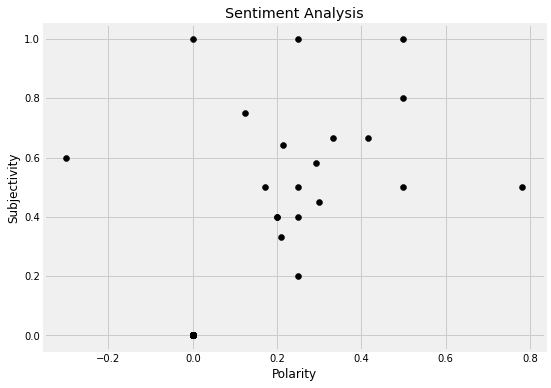

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectiviy'][i], color='black')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#persentasepositiv

ptweets = df[df.Analysis == 'positive']
ptweets = ptweets['Tweets']

round ( (ptweets.shape[0] / df.shape[0]) *100, 1)

9.0

In [ ]:
#persentasenegatif

ntweets = df[df.Analysis == 'negative']
ntweets = ntweets['Tweets']

round ( (ntweets.shape[0] / df.shape[0]) *100, 1)

0.5

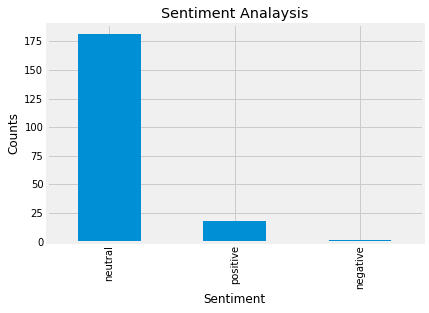

In [ ]:
#show value count

df['Analysis'].value_counts()

plt.title('Sentiment Analaysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()